In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
print(df.shape),
print(df.dtypes)

(32833, 23)
track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object


In [4]:
print("Totalnullcells:",df.isnull().values.sum())

Totalnullcells: 15


In [5]:
df['playlist_genre'].value_counts()

edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: playlist_genre, dtype: int64

In [6]:
df['playlist_subgenre'].value_counts()

progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: playlist_subgenre, dtype: int64

In [7]:
df['playlist_subgenre'].value_counts().count()

24

In [8]:
df.loc[:,['playlist_genre','track_popularity']].groupby(['playlist_genre']).mean().sort_values(by=['track_popularity'],ascending=False)

,track_popularity
playlist_genre,
pop,47.744870
latin,47.026576
rap,43.215454
rock,41.728338
r&b,41.223532
edm,34.833526


In [9]:
df.loc[:,['playlist_subgenre','track_popularity']].groupby(['playlist_subgenre']).mean().sort_values(by=['track_popularity'],ascending=False)

,track_popularity
playlist_subgenre,
post-teen pop,56.825509
permanent wave,54.000905
hip pop,53.844745
hip hop,53.773071
reggaeton,52.869336
dance pop,52.079353
latin pop,51.099842
urban contemporary,50.523843
trap,50.308288


In [11]:
df.loc[:,['track_popularity','energy']].corr(method='pearson')

,track_popularity,energy
track_popularity,1.000000,-0.109112
energy,-0.109112,1.000000


In [12]:
df.loc[:,['track_popularity','danceability']].corr(method='pearson')

,track_popularity,danceability
track_popularity,1.000000,0.064748
danceability,0.064748,1.000000


In [13]:
df.loc[:,['track_popularity','speechiness']].corr(method='pearson')

,track_popularity,speechiness
track_popularity,1.000000,0.006819
speechiness,0.006819,1.000000


In [14]:
df.loc[:,['track_popularity','danceability']].corr(method='pearson')

,track_popularity,danceability
track_popularity,1.000000,0.064748
danceability,0.064748,1.000000


In [15]:
df = pd.get_dummies(df, prefix=['playlist_genre', 'playlist_subgenre'], columns=['playlist_genre', 'playlist_subgenre'])

In [16]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,danceability,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.748,...,0,0,0,0,0,0,0,0,0,0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.726,...,0,0,0,0,0,0,0,0,0,0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.675,...,0,0,0,0,0,0,0,0,0,0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.718,...,0,0,0,0,0,0,0,0,0,0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.650,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.dtypes

track_id                                        object
track_name                                      object
track_artist                                    object
track_popularity                                 int64
track_album_id                                  object
track_album_name                                object
track_album_release_date                        object
playlist_name                                   object
playlist_id                                     object
danceability                                   float64
energy                                         float64
key                                              int64
loudness                                       float64
mode                                             int64
speechiness                                    float64
acousticness                                   float64
instrumentalness                               float64
liveness                                       float64
valence   

In [18]:
columns = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'playlist_genre_edm',
    'playlist_genre_latin',
    'playlist_genre_pop',
    'playlist_genre_r&b',
    'playlist_genre_rap',
    'playlist_genre_rock',
    'playlist_subgenre_album rock',
    'playlist_subgenre_big room',
    'playlist_subgenre_classic rock',
    'playlist_subgenre_dance pop',
    'playlist_subgenre_electro house',
    'playlist_subgenre_electropop',
    'playlist_subgenre_gangster rap',
    'playlist_subgenre_hard rock',
    'playlist_subgenre_hip hop',
    'playlist_subgenre_hip pop',
    'playlist_subgenre_indie poptimism',
    'playlist_subgenre_latin hip hop',
    'playlist_subgenre_latin pop',
    'playlist_subgenre_neo soul',
    'playlist_subgenre_new jack swing',
    'playlist_subgenre_permanent wave',
    'playlist_subgenre_pop edm',
    'playlist_subgenre_post-teen pop',
    'playlist_subgenre_progressive electro house',
    'playlist_subgenre_reggaeton',
    'playlist_subgenre_southern hip hop',
    'playlist_subgenre_trap',
    'playlist_subgenre_tropical',
    'playlist_subgenre_urban contemporary',
]

In [19]:
df[columns]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,...,0,0,0,0,0,0,0,0,0,0
1,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,...,0,0,0,0,0,0,0,0,0,0
2,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,...,0,0,0,0,0,0,0,0,0,0
3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,...,0,0,0,0,0,0,0,0,0,0
4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,...,0,0,0,0,1,0,0,0,0,0
32829,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,...,0,0,0,0,1,0,0,0,0,0
32830,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,...,0,0,0,0,1,0,0,0,0,0
32831,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,...,0,0,0,0,1,0,0,0,0,0


In [20]:
X = df[columns]
y = df['track_popularity']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y) 

Text(0, 0.5, 'Accuracy')

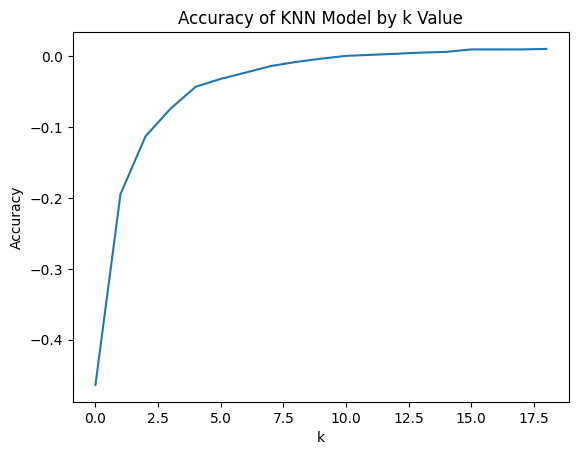

In [22]:
values = []

for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    values.append(knn.score(X_test, y_test))

plt.plot(values)
plt.title("Accuracy of KNN Model by k Value")
plt.xlabel("k")
plt.ylabel("Accuracy")

In [23]:
knn = KNeighborsRegressor(n_neighbors = 100) #initialize the classifier and set the number of neighbors
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [24]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(mse)
    

607.9214787005076


# Support Vector Machine (SVM)

In [25]:
clustDf = df[:]
X = df[['danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'playlist_genre_edm',
    'playlist_genre_latin',
    'playlist_genre_pop',
    'playlist_genre_r&b',
    'playlist_genre_rap',
    'playlist_genre_rock',
    'playlist_subgenre_album rock',
    'playlist_subgenre_big room',
    'playlist_subgenre_classic rock',
    'playlist_subgenre_dance pop',
    'playlist_subgenre_electro house',
    'playlist_subgenre_electropop',
    'playlist_subgenre_gangster rap',
    'playlist_subgenre_hard rock',
    'playlist_subgenre_hip hop',
    'playlist_subgenre_hip pop',
    'playlist_subgenre_indie poptimism',
    'playlist_subgenre_latin hip hop',
    'playlist_subgenre_latin pop',
    'playlist_subgenre_neo soul',
    'playlist_subgenre_new jack swing',
    'playlist_subgenre_permanent wave',
    'playlist_subgenre_pop edm',
    'playlist_subgenre_post-teen pop',
    'playlist_subgenre_progressive electro house',
    'playlist_subgenre_reggaeton',
    'playlist_subgenre_southern hip hop',
    'playlist_subgenre_trap',
    'playlist_subgenre_tropical',
    'playlist_subgenre_urban contemporary']]

In [26]:
X_train_SVM = X_train.copy()
X_test_SVM  = X_test.copy()

In [27]:
X_train_SVM

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
1395,0.807,0.887,1,-4.311,0,0.0361,0.0160,0.000503,0.0811,0.606,...,0,0,0,1,0,0,0,0,0,0
1113,0.595,0.772,8,-8.033,1,0.0367,0.1260,0.926000,0.2210,0.345,...,0,0,0,0,0,0,0,0,0,0
9179,0.690,0.629,10,-7.349,0,0.3180,0.5220,0.000000,0.5260,0.212,...,0,0,0,0,0,0,0,0,0,0
21035,0.730,0.613,6,-5.830,1,0.0767,0.0914,0.000000,0.1670,0.959,...,0,0,0,0,0,0,0,0,0,0
12027,0.510,0.376,2,-10.995,1,0.0307,0.8650,0.000121,0.1130,0.321,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686,0.846,0.420,10,-13.927,0,0.1170,0.1520,0.000018,0.2510,0.633,...,0,0,0,0,0,0,0,0,0,0
22585,0.351,0.622,8,-6.495,0,0.2350,0.2560,0.000034,0.6130,0.457,...,0,0,0,0,0,0,0,0,0,1
24055,0.743,0.860,5,-6.346,1,0.0445,0.2260,0.000422,0.0513,0.687,...,1,0,0,0,0,0,0,0,0,0
8354,0.732,0.584,11,-8.641,1,0.1380,0.0408,0.000000,0.0558,0.474,...,0,0,0,0,0,0,1,0,0,0


In [28]:
#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train_SVM[['danceability',
    'energy',
    'key',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms']])

X_train_SVM[['danceability',
    'energy',
    'key',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms']] = scaler.transform(X_train[['danceability',
                                                'energy',
                                                'key',
                                                'loudness',
                                                'speechiness',
                                                'acousticness',
                                                'instrumentalness',
                                                'liveness',
                                                'valence',
                                                'tempo',
                                                'duration_ms']]) #scale the training data

In [29]:
X_train_SVM.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
1395,1.045135,1.040345,-1.207412,0.803178,0,-0.700203,-0.725849,-0.375997,-0.707501,0.411982,...,0,0,0,1,0,0,0,0,0,0
1113,-0.414525,0.404941,0.727056,-0.432362,1,-0.694309,-0.226352,3.747769,0.195671,-0.709291,...,0,0,0,0,0,0,0,0,0,0
9179,0.239568,-0.385171,1.279761,-0.205304,0,2.069207,1.571836,-0.378239,2.164704,-1.280667,...,0,0,0,0,0,0,0,0,0,0
21035,0.514976,-0.473575,0.174351,0.298937,1,-0.301345,-0.383466,-0.378239,-0.152944,1.928491,...,0,0,0,0,0,0,0,0,0,0
12027,-0.999766,-1.783061,-0.931059,-1.415615,1,-0.753253,3.129357,-0.377699,-0.501560,-0.812396,...,0,0,0,0,0,0,0,0,0,0
27074,-0.090921,-2.484769,0.727056,-4.259813,1,1.322576,2.761546,3.369032,-0.236870,-1.435325,...,0,0,0,0,0,0,0,0,0,0
11136,1.162184,-1.777536,-1.207412,-0.706557,0,3.385634,0.686365,-0.378239,-0.449913,-0.460119,...,0,0,0,0,0,0,0,1,0,0
20433,-0.765670,-1.667031,1.279761,-0.734442,1,-0.788620,2.180314,-0.378239,0.305421,-0.013329,...,0,0,0,0,0,0,0,0,0,0
10151,1.912669,-0.573030,-1.483764,-0.294600,1,-0.109776,0.055182,-0.377762,0.182760,0.270211,...,0,0,0,0,0,0,0,1,0,0
3368,-0.565999,1.040345,1.003409,0.294290,1,-0.705115,-0.677715,-0.378220,-0.642943,1.090759,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#initialize the classifier

svm = SVC()
svm.fit(X_train_SVM, y_train) #fit the data

SVC()

In [31]:
X_test_SVM[['danceability',
    'energy',
    'key',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms']] = scaler.transform(X_test[['danceability',
                                                'energy',
                                                'key',
                                                'loudness',
                                                'speechiness',
                                                'acousticness',
                                                'instrumentalness',
                                                'liveness',
                                                'valence',
                                                'tempo',
                                                'duration_ms']]) #scale the training data

In [32]:
#predict the labels for the test set
y_pred   = svm.predict(X_test_SVM)

print('The predicted track popularity is: {}'.format(y_pred))

The predicted track popularity is: [ 0  0  0 ...  0  0 54]


In [33]:
print('The accuracy of the model is: {}'.format(round(svm.score(X_test_SVM, y_test),2)))

The accuracy of the model is: 0.09


In [34]:
mse = mean_squared_error(y_test, y_pred)

print("The MSE is", round(mse,2))
    

The MSE is 2019.71


In [35]:
#Hyperparameter tuning

#setup the parameter grid to try values of c ranging from 1 to 10, and values for gamma ranging from 1 to 5.
params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}

svm = SVC()

#doesn't stop

#initialize Grid Search with Cross Validation
#svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5)
#svm_grid.fit(X_train_SVM, y_train)

#print(svm_grid.best_params_) #print the best parameters
#print(svm_grid.best_score_)  #print the best score

In [36]:
#Hyperparemeter tuning doesn't stop

#display the cv results for the train and test set
#cv_results = pd.DataFrame(svm_grid.cv_results_)
#cv_results = cv_results.sort_values('mean_test_score', ascending=False)
#cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

# Random Forest Regression

In [37]:
X = df[columns]
y = df['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [40]:
y_pred   = rf.predict(X_test)

print('The predicted popularity level is: {}'.format(y_pred))

The predicted popularity level is: [40.284  36.8    42.31   ... 55.3775 35.865  44.17  ]


In [41]:
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 452.36845613720806


In [42]:
rf = RandomForestRegressor(n_estimators=20, random_state=7)
rf.fit(X_train, y_train)
y_pred   = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 471.9111144247759


In [43]:
rf = RandomForestRegressor(n_estimators=50, random_state=7)
rf.fit(X_train, y_train)
y_pred   = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 457.9021129415869


In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=7)
rf.fit(X_train, y_train)
y_pred   = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 452.36845613720806


In [45]:
rf = RandomForestRegressor(n_estimators=1000, random_state=7)
rf.fit(X_train, y_train)
y_pred   = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse))

KeyboardInterrupt: 

Output not shown because of the long training time, mse was 447.399

In [48]:
rf.score(X_test, y_test)

0.2811276982428039